### Описание данных  

Файл содержит [биржевой стакан](https://en.wikipedia.org/wiki/Order_book_(trading)) для некоторого актива. Стакан состоит из ценовых уровней и объема заявок на каждом уровне. Глубина стакана - 5.  

Описание колонок:  
ask_rate - цены заявок на продажу  
ask_amount - объёмы заявок на продажу  
bid_rate - цены заявок на покупку  
bid_amount - объёмы заявок на покупку
midprice - цена актива  
signal - сигнал, полученный от модели, которая оценивает изменение цены 

#### Цена актива
На каждый тик определим цену актива. Возьмём среднее между наименьшим ask_rate (askbest) и наибольшим bid_rate (bidbest) в момент времени t:  
$$ midprice(t) = \frac{(askbest(t) + bidbest(t))}{2} $$  

С помощью сигнала от модели определим прогноз цены в будущем:  
$$midprice(t + 1) = midprice(t) + signal(t)$$

### Считывание данных

In [1]:
# !pip3 install fastparquet

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from backtest import *

In [101]:
backtest_df = pd.read_parquet('test_quant.parquet')

In [4]:
backtest_df.tail(15)

,ask_rate,ask_amount,bid_rate,bid_amount,midprice,target,signal
index,,,,,,,
2019-09-18 06:08:45.226,"[380.05, 380.07, 380.08, 380.09, 380.13]","[41.99316, 5.0562, 0.72835, 0.50151, 24.83]","[380.04, 380.03, 380.02, 380.01, 380.0]","[0.73912, 0.05783, 4.57662, 0.1346, 7.23986]",380.045,-0.020,-0.003792
2019-09-18 06:08:45.326,"[380.05, 380.07, 380.08, 380.09, 380.13]","[46.54785, 0.50151, 0.72835, 0.50151, 24.83]","[380.04, 380.03, 380.01, 380.0, 379.99]","[0.59801, 0.05783, 0.1346, 7.23986, 0.031]",380.045,-0.020,-0.003442
2019-09-18 06:08:45.426,"[380.05, 380.07, 380.08, 380.09, 380.13]","[35.03614, 0.50151, 0.72835, 0.50151, 24.83]","[380.04, 380.03, 380.01, 380.0, 379.99]","[0.59801, 0.05783, 0.1346, 7.23986, 0.031]",380.045,-0.025,-0.001372
2019-09-18 06:08:45.526,"[380.05, 380.07, 380.08, 380.09, 380.13]","[35.03614, 0.50151, 0.72835, 0.50151, 24.83]","[380.04, 380.03, 380.01, 380.0, 379.99]","[0.59801, 0.05783, 4.71122, 7.23986, 0.031]",380.045,-0.030,-0.000414
2019-09-18 06:08:45.627,"[380.04, 380.05, 380.06, 380.07, 380.08]","[0.50151, 5.03614, 0.13, 0.50151, 0.72835]","[380.01, 380.0, 379.99, 379.98, 379.96]","[35.7541, 7.23986, 0.031, 0.02895, 12.31323]",380.025,-0.010,0.002578
2019-09-18 06:08:45.727,"[380.04, 380.05, 380.06, 380.07, 380.08]","[0.50151, 5.20511, 0.13, 0.50151, 0.48145]","[380.01, 380.0, 379.99, 379.98, 379.96]","[35.7541, 7.23986, 0.031, 0.02895, 10.41323]",380.025,-0.010,0.001689
2019-09-18 06:08:45.827,"[380.03, 380.04, 380.05, 380.06, 380.07]","[9.0, 0.50151, 5.20511, 0.13, 0.50151]","[380.01, 380.0, 379.99, 379.98, 379.96]","[35.7541, 7.23986, 0.031, 0.02895, 10.41323]",380.020,-0.005,-0.002494
2019-09-18 06:08:45.927,"[380.02, 380.03, 380.04, 380.05, 380.06]","[0.50151, 62.3976, 5.07417, 0.65042, 0.13]","[380.01, 380.0, 379.99, 379.98, 379.96]","[30.0, 7.23986, 0.031, 0.02895, 10.41323]",380.015,0.000,0.000128
2019-09-18 06:08:46.027,"[380.02, 380.03, 380.04, 380.05, 380.07]","[6.69123, 54.3976, 0.50151, 0.65042, 0.50151]","[380.01, 380.0, 379.99, 379.98, 379.96]","[30.0, 7.23986, 0.031, 0.02895, 10.41323]",380.015,0.000,0.000826


In [7]:
backtest_df.shape

(787690, 7)

### Пример стратегии

#### Принцип работы стратегии  
Стратегия - это некоторый набор условий, по которому в каждый момент времени принимается решение, нужно ли сейчас покупать, продавать, либо ничего не делать.  
Результат работы стратегии - необходимый объем сделки (```order_size```). Если значение объема положительное - совершается покупка (buy). Если отрицательное - продажа (sell). Если 0 - ничего не происходит (hold).  

```order_size = 1``` — сделать покупку объемом 1  
```order_size = -1``` — сделать продажу объемом 1  

Совершение сделки на покупку изменяет текущую позицию (```current_position```) в положительную сторону, на продажу - в отрицательную.  
Текущая позиция отражает кумулятивную сумму купленных и проданных объемов.  
Пример изменения текущей позиции:  

```1. order_size = 0 -> current_position = 0```  
```2. order_size = 1 -> current_position = 1  # открытие позиции```  
```3. order_size = -1 -> current_position = 0  # закрытие позиции```  
  
Максимальная позиция (```max_position```) - наибольшее абсолютное значение текущей позиции. Если текущая позиция равна максимальной, нельзя совершать сделки в ту же сторону.  
При ```max_position = 1```:   

```1. order_size = 0 -> current_position = 0```  
```2. order_size = -1 -> current_position = -1```  
```3. order_size = -1 -> current_position = -1  # нельзя превысить max_position```   
```4. order_size = 1 -> current_position = 0```   

In [104]:
def basic_strategy(strategy_state, orderbook_state, trade_size, storage, max_position=1):
    '''
    Описание стратегии
    --------------
    Совершает покупку, если сигнал положительный и текущая абсолютная позиция меньше максимальной.
    Совершает продажу, если сигнал отрицательный и текущая абсолютная позиция меньше максимальной.
    
    Параметры
    --------------
    strategy_state : list
        Массив, содержащий index (номер тика), current_position (текущую позицию)
        и signal (сигнал модели для данного тика).
    orderbook_state : list
        Массив, содержащий информацию о стакане для данного тика.
    trade_size : float
        Объем одной сделки.
    storage : dict
        Словарь для сохранения информации с прошлых тиков.
    max_position : int
        Максимальный объем открытой позиции в одну сторону. Должен быть равен 1.
    
    Результат
    --------------
    order_size : float
        Стратегия возвращает объем сделки, где знак обозначает сторону сделки: 
        положительный для покупки и отрицательный для продажи
    '''
    index, current_position, signal = strategy_state
    ask_rate, ask_amount, bid_rate, bid_amount = orderbook_state
    
    # prev_signal = storage.get('prev_signal', 0)  # пример использования storage
    if signal < 0:  # покупка
        order_size = min(trade_size, max_position - current_position)  # определение объема сделки
    elif signal > 0:  # продажа
        order_size = -min(trade_size, max_position + current_position)  # определение объема сделки
    else:
        order_size = 0
    # storage['prev_signal'] = signal  # пример использования storage
    
    return order_size

In [105]:
strategy_params = {}
strategy_params['trade_size'] = 1  # максимальное значение = 1
strategy_params['storage'] = {}  

### Бэктест
Для проверки качества стратегии используются исторические данные, на которых с помощью бэктеста симулируется работа стратегии

{'pnl': -4937.8701338001265, 'pnl_after_fee': -16218.356973433294, 'actions': 321858}


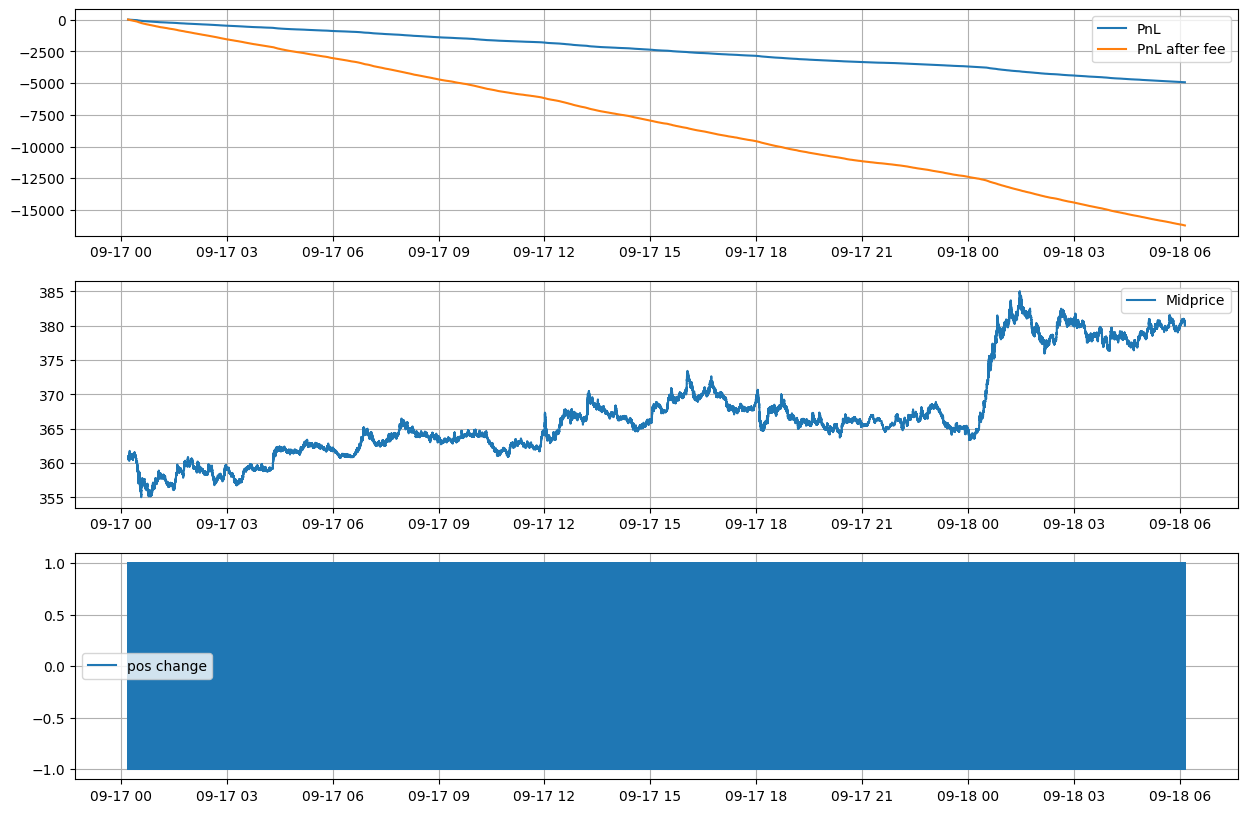

In [106]:
summary, result = backtest(backtest_df, basic_strategy, strategy_params, viz=True)

Бэктест возвращает результат работы стратегии.  
```summary``` содержит итоговую информацию:
- pnl : Profits and Losses (PnL, P&L) - сумма всех доходов и убытков по закрытым позициям. 
- **pnl_after_fee : Pnl после комиссии. За каждую сделку биржа берёт комиссию. В данном случае она составляет 0.0001 от цены актива в момент совершения сделки. Это ключевой показатель при анализе эффективности стратегии.**  
- actions : Количество сделок, совершенное стратегией  

Выводы по этой стратегии:  
Она слишком чувствительна к сигналу, поэтому совершает большое количество сделок, из которых почти все убыточны. 

```result``` - исходный датафрейм, к которому добавлены данные по стратегии в каждый момент времени. Может использоваться для детального анализа работы стратегии

Ниже пример работы другой стратегии. Его можно использовать как бейзлайн.

{'pnl': 40.425888500000305, 'pnl_after_fee': 27.54488769229031, 'actions': 374}


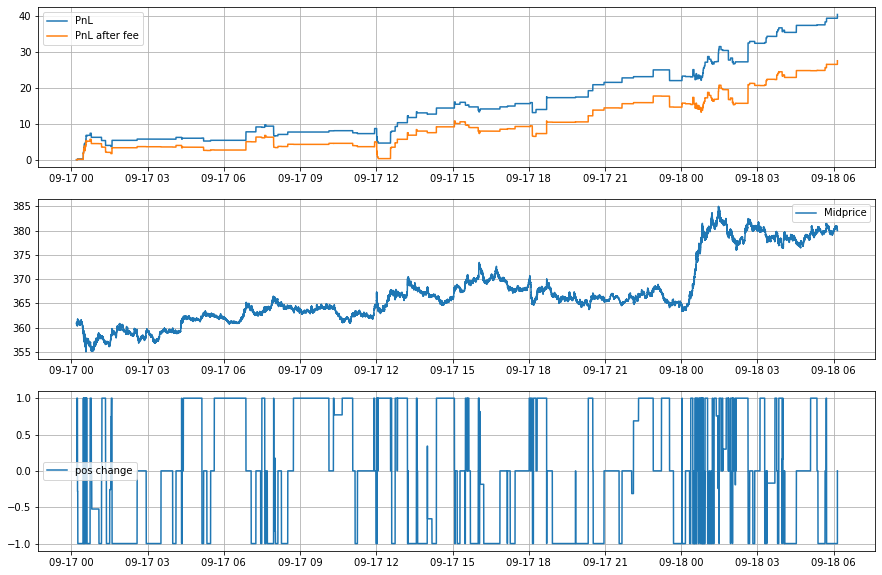

In [12]:
# summary, result = backtest(backtest_df, strategy, strategy_params, viz=True)

### Задачa
Написать свою торговую стратегию, которая будет опираться на сигнал модели для принятия решения.  
#### Ограничения: 
- Максимальная позиция не должна превышать 1
- Нельзя самостоятельно вносить изменения в бэктест
- Стратегия должна содержать текстовое описание  

#### Критерии оценки стратегии:
- Pnl после комиссии 
- Количество сделок > 50

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from backtest import *

In [3]:
backtest_df = pd.read_parquet('test_quant.parquet')

In [4]:
df = backtest_df.copy()
mid_rate = df["midprice"].diff().to_numpy()
mid_rate = np.roll(mid_rate, -1)
df = df.reset_index()
df["mid_rate"] = pd.DataFrame(mid_rate)
df = df.drop(index = 787689).set_index("index")
df["max_ask"] = df["ask_amount"].apply(lambda x: np.array(x).max())
df["max_bid"] = df["bid_amount"].apply(lambda x: np.array(x).max())
df["amount_rate"] = df["max_ask"] - df["max_bid"]
df["volprice"] = df["max_ask"] * df["ask_rate"].apply(lambda x: np.array(x).mean())
df["volprice"] += df["max_bid"] * df["bid_rate"].apply(lambda x: np.array(x).mean())
df["volprice"] /= (df["max_bid"] + df["max_ask"])
df["volprice"] = df["volprice"].apply(lambda x: np.round(x, 3))
df

,ask_rate,ask_amount,bid_rate,bid_amount,midprice,target,signal,mid_rate,max_ask,max_bid,amount_rate,volprice
index,,,,,,,,,,,,
2019-09-17 00:12:02.282,"[360.94, 360.97, 360.98, 361.0, 361.01]","[148.80726, 0.1789, 29.76657, 8.31106, 5.2817]","[360.93, 360.9, 360.87, 360.86, 360.85]","[1.38483, 0.21534, 4.88014, 1.07505, 3.55067]",360.935,0.00,-0.004177,0.00,148.80726,4.88014,143.92712,360.977
2019-09-17 00:12:02.382,"[360.94, 360.97, 360.98, 361.0, 361.01]","[178.80726, 0.1789, 29.76657, 8.31106, 5.2817]","[360.93, 360.9, 360.87, 360.86, 360.85]","[1.38483, 0.21534, 4.88014, 1.07505, 0.14]",360.935,0.00,-0.003240,0.00,178.80726,4.88014,173.92712,360.977
2019-09-17 00:12:02.482,"[360.94, 360.97, 360.98, 361.0, 361.01]","[178.80726, 0.1789, 29.76657, 8.31106, 5.2817]","[360.93, 360.9, 360.88, 360.87, 360.86]","[1.38483, 0.00018, 0.13813, 0.38014, 1.07505]",360.935,0.00,-0.003761,0.00,178.80726,1.38483,177.42243,360.979
2019-09-17 00:12:02.982,"[360.94, 360.97, 360.98, 361.0, 361.01]","[181.41086, 0.1789, 29.76657, 8.31106, 5.2817]","[360.93, 360.9, 360.88, 360.87, 360.86]","[1.38483, 0.00018, 0.13813, 0.38014, 1.07505]",360.935,-0.02,-0.002957,0.00,181.41086,1.38483,180.02603,360.979
2019-09-17 00:12:03.283,"[360.94, 360.97, 360.98, 361.0, 361.01]","[181.19816, 0.1789, 29.76657, 8.31106, 5.2817]","[360.93, 360.9, 360.88, 360.87, 360.86]","[1.38483, 0.00018, 0.13813, 0.38014, 1.07505]",360.935,-0.02,-0.003383,0.00,181.19816,1.38483,179.81333,360.979
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-18 06:08:46.127,"[380.02, 380.03, 380.04, 380.05, 380.07]","[4.57266, 54.3976, 0.50151, 0.48145, 0.50151]","[380.01, 380.0, 379.99, 379.98, 379.96]","[30.0, 7.23986, 0.031, 0.21925, 10.41323]",380.015,0.00,-0.000595,0.00,54.39760,30.00000,24.39760,380.023
2019-09-18 06:08:46.227,"[380.02, 380.03, 380.04, 380.05, 380.07]","[4.57266, 54.3976, 0.50151, 0.48145, 0.50151]","[380.01, 380.0, 379.99, 379.98, 379.96]","[30.0, 7.23986, 0.031, 1.45021, 10.41323]",380.015,-0.01,-0.000562,0.00,54.39760,30.00000,24.39760,380.023
2019-09-18 06:08:46.427,"[380.02, 380.03, 380.04, 380.05, 380.06]","[9.0, 58.97026, 0.50151, 0.48145, 0.13]","[380.01, 380.0, 379.99, 379.98, 379.96]","[30.0, 7.23986, 0.24296, 0.02895, 10.41323]",380.015,-0.01,-0.002318,0.00,58.97026,30.00000,28.97026,380.022


In [16]:
df["vol_mid"] = df["midprice"] - df["volprice"]
research = df.loc[:, ["mid_rate", "signal", "amount_rate", "vol_mid"]]
print(research.describe())
signal_filter = research[(research["signal"] < -0.001128) + (research["signal"] > 0.000976)]
amount_filter = signal_filter[(signal_filter["amount_rate"] < -24.46) + (signal_filter["amount_rate"] > 23.965)]
volmid_filter = amount_filter[(amount_filter["vol_mid"] < -0.019) + (amount_filter["vol_mid"] > 0.018)]
research_filter = volmid_filter[volmid_filter["mid_rate"] != 0.0]
research_filter[(research_filter["mid_rate"] > 0.0) * (research_filter["signal"] < 0.0) * (research_filter["vol_mid"] < 0.0) * (research_filter["amount_rate"] < 0.0)]
research_filter[(research_filter["mid_rate"] > 0.0) * (research_filter["signal"] > 0.0) * (research_filter["vol_mid"] > 0.0) * (research_filter["amount_rate"] < 0.0)]

            mid_rate         signal    amount_rate        vol_mid
count  787689.000000  787689.000000  787689.000000  787689.000000
mean        0.000024      -0.000095      -2.356002      -0.000079
std         0.015293       0.003192      81.165538       0.025421
min        -0.485000      -0.106138   -2988.000000      -0.399000
25%         0.000000      -0.001128     -24.460320      -0.019000
50%         0.000000      -0.000012      -0.062070       0.000000
75%         0.000000       0.000976      23.964790       0.018000
max         0.455000       0.061021    3368.522140       0.252000


,mid_rate,signal,amount_rate,vol_mid
index,,,,
2019-09-17 00:12:10.987,0.015,0.008568,-40.22355,0.023
2019-09-17 00:12:11.087,0.015,0.002907,-69.22355,0.042
2019-09-17 00:12:13.088,0.050,0.002643,-74.16038,0.027
2019-09-17 00:12:19.591,0.015,0.001507,-46.64099,0.019
2019-09-17 00:12:21.792,0.030,0.001045,-72.72110,0.041
...,...,...,...,...
2019-09-18 06:08:13.910,0.015,0.002345,-65.53478,0.042
2019-09-18 06:08:14.110,0.025,0.001666,-53.47069,0.042
2019-09-18 06:08:16.111,0.020,0.002849,-34.62293,0.036


In [4]:
def quant_strategy(strategy_state, orderbook_state, trade_size, storage, max_position=1):
    '''
    Анализ маркетдаты
    --------------
    signal - очень шумная фича, чтобы ее использовать для совершения покупки/продажи. 
    Если мы получим mid_rate = mitprice[i+1] - midprice[i] устраним смещение и решим 
    проанализировать качество предсказаний signal, просто по направлению - то окажется, 
    что только 2% датасета успешно предсказано. Поэтому было решено доюавить пару новых фич:

    volume_price = (ask_rate.mean * ask_amount.max + bid_rate.mean * bid_amount.max) / (bid_amount.max + bid_mount.min)
    
    vol_mid = volume_price - midprice
    
    amount_rate = ask_amount.max - bid_amount.max  
    
    Данные фичи достаточно логичные по своему смыслу и простые при расчете, поэтому было 
    решено добавить две последние для фильтрации signal. Результат вышел хорошим - получилось 
    с помощью этих фичей запредиктить около 80% от 2% предсказанного датасета. Поэтому две 
    последние фичи легли в основу торговой стратегии, дополнительно к signal. 

    Описание стратегии
    --------------
    Точки входа:
    В анализе были использованы квантили фичей, чтобы понять какие числовые показатели фичей 
    являются значимыми(статистических тестов не делал и p-value не могу указать). Применять 
    эти же квантили для торговли - считай заниматься overfitting. Поэтому хотелось бы принимать 
    решения только на маркетдате за n - прошлых тиков и динамически менять параметры под рынок. 
    Знаиматься этим хотелось бы с частотой 1/k тиков. Поэтому первая часть стратегии - создание 
    структуры стека длины n(first in las out) из storage и реализация реоптимизации каждые k тиков. 
    Из - за структуры бэктеста - пришлось добавить дополнительное поле для сохранения предыдущей 
    стадии реоптимизации в словаре storage. В данном случае n = 1200, k = 50.

    Манименеджмент:
    Дополнительно к условиям на проведение сделок были добавлены фичи:
    
    spread = (ask_rate.max - bid_rate.min) / midprice
    
    width = max(min(1%qunatile(spread), 0.005), 0.009)
    
    Она была добавлена для того, чтобы контроллировать ширину зоны прибыльности/убытков через 
    1% квантиль ограниченный сверху/снизу числовыми значениями. Данные числовые значения получены 
    исходя из количества сделок(если сделок будет очень много - то комиссионные издержки значительно 
    вырастут).

    Стоит сказать, что поскольку профит/убыток одинаково ограничены сверху - то для положительного 
    матожидания необходим строго положительный винрейт с запасом (на комиссии).   
    
    Торговая стратегия:

    Условия входа в лонг:
    signal > 75%quantile(signal) and vol_mid > 75%quantile(vol_mid) and amount_rate < 25%quantile(amount_rate)
    
    Условия выхода из лонга:
    профит: current_midprice - entry_midprice > 1%quantile(spread) * current_midprice
    убыток: current_midprice - entry_midprice < 1%quantile(spread) * current_midprice
    
    Условия выхода из лонга:
    профит: current_midprice - entry_midprice > width * current_midprice
    убыток: current_midprice - entry_midprice < -width * current_midprice

    Условия входа в шорт:
    signal < 25%quantile(signal) and vol_mid < 25%quantile(vol_mid) and amount_rate > 75%quantile(amount_rate)
    
    Условия выхода из шорта:
    профит: current_midprice - entry_midprice < -width * current_midprice
    убыток: current_midprice - entry_midprice > width * current_midprice

    Параметры
    --------------
    strategy_state : list
        Массив, содержащий index (номер тика), current_position (текущую позицию)
        и signal (сигнал модели для данного тика).
    orderbook_state : list
        Массив, содержащий информацию о стакане для данного тика.
    trade_size : float
        Объем одной сделки.
    storage : dict
        Словарь для сохранения информации с прошлых тиков. Stack structure
    max_position : int
        Максимальный объем открытой позиции в одну сторону. Должен быть равен 1.
    
    Результат
    --------------
    order_size : float
        Стратегия возвращает объем сделки, где знак обозначает сторону сделки: 
        положительный для покупки и отрицательный для продажи
    '''
    # market/strategy data
    index, current_position, signal = strategy_state
    ask_rate, ask_amount, bid_rate, bid_amount = orderbook_state
    
    # syntetic marketdata
    midprice = np.round(0.5 * (np.array(ask_rate).min() + np.array(bid_rate).max()), 3)
    max_ask = np.array(ask_amount).max()
    max_bid = np.array(bid_amount).max()
    spread = (np.array(ask_amount).max() - np.array(bid_amount).min()) / midprice
    volprice = np.round((np.array(ask_rate).mean() * max_ask + np.array(bid_rate).mean() * max_bid) / (max_ask + max_bid) , 3) 
    
    # costruct structure of moving stack
    if len(storage) < 1200:
        storage[index] = [[midprice, volprice, max_ask, max_bid, signal, spread], 
                          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0]]
    if len(storage) >= 1200:
        storage.pop(index - 1199)
        storage[index] = [[midprice, volprice, max_ask, max_bid, signal, spread], 
                          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0]]
        storage[index][2] = storage[index-1][2]

    if index % 50 == 0:
    # reoptimization
        vol_mid = np.array([storage[i][0][0] for i in storage])
        vol_mid -= np.array([storage[i][0][1] for i in storage])
        storage[index][1][0] = np.quantile(vol_mid, 0.25)
        storage[index][1][1] = np.quantile(vol_mid, 0.75)
        amt_rate = np.array([storage[i][0][2] for i in storage])
        amt_rate -= np.array([storage[i][0][3] for i in storage])
        storage[index][1][2] = np.quantile(amt_rate, 0.25)
        storage[index][1][3] = np.quantile(amt_rate, 0.75)
        signals = np.array([storage[i][0][4] for i in storage])
        storage[index][1][4] = np.quantile(signals, 0.25)
        storage[index][1][5] = np.quantile(signals, 0.75)
        spreads = np.array([storage[i][0][5] for i in storage])
        storage[index][1][6] = min(max(np.quantile(spreads, 0.01), 0.005), 0.009)
        order_size = 0
    else:
    # trading
        storage[index][1] = storage[index-1][1]
        amt = max_ask - max_bid
        vm = midprice - volprice
        open_long = signal > storage[index][1][5] and vm > storage[index][1][1] and amt < storage[index][1][2]
        long_profit = midprice - storage[index][2][0] > storage[index][1][6] * midprice        
        long_loss = midprice - storage[index][2][0] < -storage[index][1][6] * midprice
        close_long = long_profit or long_loss
        open_short = signal < storage[index][1][4] and vm < storage[index][1][0] and amt > storage[index][1][3]
        short_profit = midprice - storage[index][2][0] < -storage[index][1][6] * midprice
        short_loss = midprice - storage[index][2][0] > storage[index][1][6] * midprice 
        close_short = short_profit or short_loss
        if open_long and current_position == 0:
            order_size = trade_size
            storage[index][2][0] = midprice
        elif close_long and current_position > 0:
            order_size = -current_position
            storage[index][2][0] = 0
        elif open_short and current_position == 0:
            order_size = -trade_size
            storage[index][2][0] = midprice
        elif close_short and current_position < 0:        
            order_size = -current_position
            storage[index][2][0] = 0
        else:
            order_size = 0
    return order_size

In [5]:
strategy_params = {}
strategy_params['trade_size'] = 1  # максимальное значение = 1
strategy_params['storage'] = {}
bckt = backtest_df.reset_index().rename({"index": "datetime"}) 

{'pnl': 37.7458279000003, 'pnl_after_fee': 27.799576784380285, 'actions': 306}


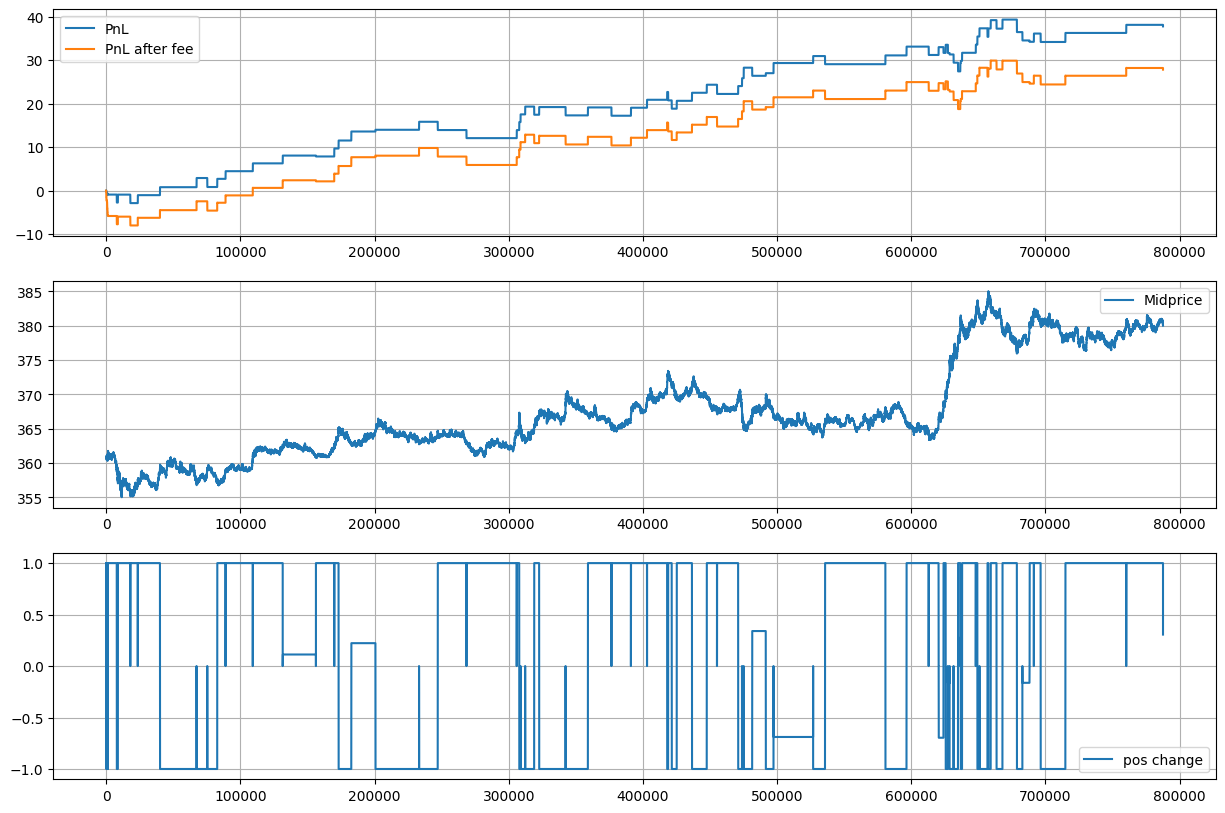

In [6]:
summary, result = backtest(bckt, quant_strategy, strategy_params, viz=True)